<a href="https://colab.research.google.com/github/f3lipems/big-data-science/blob/main/transformacao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

<Axes: xlabel='wt', ylabel='mpg'>

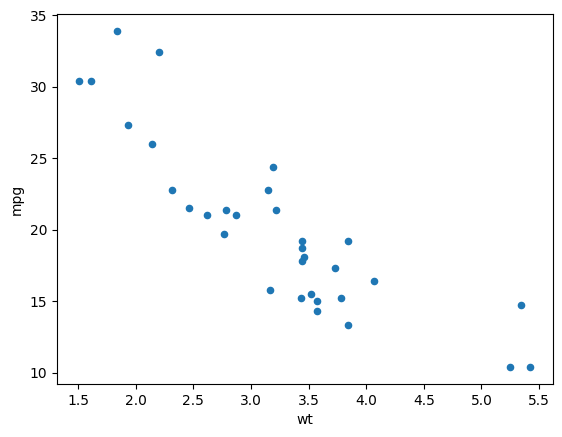

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv')

# Análise Desctiva
df.plot.scatter(x='wt', y='mpg')

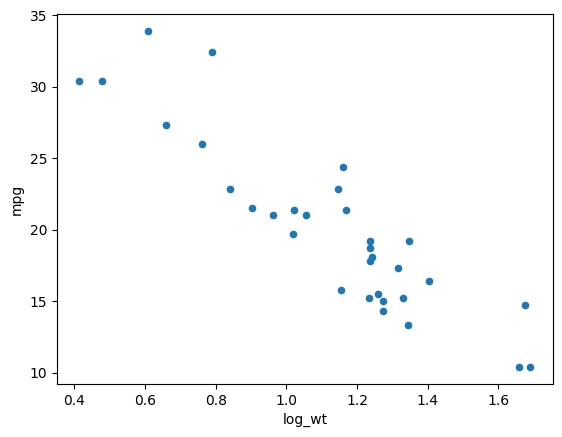

In [36]:
# Hipótese 1
df['log_wt'] = np.log(df['wt'])
df.plot.scatter(x='log_wt', y='mpg')

# Hipótese 2 - wt pode ser modelado com comportamento de uma curva quadrativca (polinomial)
poly = PolynomialFeatures(degree=2)

In [31]:
# Matriz de correlação
dfn = df.select_dtypes(include=[np.number])
dfn.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,log_wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925,-0.900081
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,0.801618
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,0.863715
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,0.663691
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,-0.731244
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,0.978822
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,-0.180540
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,-0.564760
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,-0.721678
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,-0.584099


In [37]:
# 3. Separação de Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df.mpg, test_size=0.25, random_state=1)

# Aplicação da transformação polinomial
x_treino = poly.fit_transform(x_treino)
x_teste = poly.fit_transform(x_teste)
x_treino

array([[ 1.      ,  1.835   ,  3.367225],
       [ 1.      ,  5.25    , 27.5625  ],
       [ 1.      ,  3.845   , 14.784025],
       [ 1.      ,  3.44    , 11.8336  ],
       [ 1.      ,  2.465   ,  6.076225],
       [ 1.      ,  2.14    ,  4.5796  ],
       [ 1.      ,  3.44    , 11.8336  ],
       [ 1.      ,  2.32    ,  5.3824  ],
       [ 1.      ,  1.935   ,  3.744225],
       [ 1.      ,  3.57    , 12.7449  ],
       [ 1.      ,  3.78    , 14.2884  ],
       [ 1.      ,  3.19    , 10.1761  ],
       [ 1.      ,  2.77    ,  7.6729  ],
       [ 1.      ,  2.875   ,  8.265625],
       [ 1.      ,  5.345   , 28.569025],
       [ 1.      ,  2.62    ,  6.8644  ],
       [ 1.      ,  5.424   , 29.419776],
       [ 1.      ,  2.78    ,  7.7284  ],
       [ 1.      ,  3.57    , 12.7449  ],
       [ 1.      ,  3.44    , 11.8336  ],
       [ 1.      ,  3.15    ,  9.9225  ],
       [ 1.      ,  3.73    , 13.9129  ],
       [ 1.      ,  4.07    , 16.5649  ],
       [ 1.      ,  3.46    , 11.9

In [38]:
# 4. Modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

# R2
print(modelo.score(x_treino, y_treino))

0.8075218326151034


In [39]:
# Erro de previsão

y_prev = modelo.predict(x_teste)
print(mean_squared_error(y_teste, y_prev))

10.391213674791437
